# **HEALTH CARE EXPLORATORY DATA ANALYSIS(EDA)**

Healthcare is a critical domain where data plays pivotal role in understanding patient demographics,medical conditions, and the effectiveness of healthcare services. In this EDA project, we will delve into a synthetic healthcare dataset that mimics real-world data.
This dataset encompasses various aspects of patient information, admission details, medical conditions, and healthcare services, making it a comprehensive dataset for analysis. The primary goal of this project is to explore, clean, and visualize the data to gain insights into healthcare trends and understand the distribution of medical conditions.

**IMPORT NECESSARY LIBRARIES**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

**LOADING THE DATASET**

In [2]:
#read_csv functions helps to load the csv file data and create a dataframe in pandas
healthcare = pd.read_csv('healthcare_dataset.csv')
#the below code displays the dataframe transpose for the 1st five rows
healthcare.head().T

,0,1,2,3,4
Name,Tiffany Ramirez,Ruben Burns,Chad Byrd,Antonio Frederick,Mrs. Brandy Flowers
Age,81,35,61,49,51
Gender,Female,Male,Male,Male,Male
Blood Type,O-,O+,B-,B-,O-
Medical Condition,Diabetes,Asthma,Obesity,Asthma,Arthritis
Date of Admission,2022-11-17,2023-06-01,2019-01-09,2020-05-02,2021-07-09
Doctor,Patrick Parker,Diane Jackson,Paul Baker,Brian Chandler,Dustin Griffin
Hospital,Wallace-Hamilton,"Burke, Griffin and Cooper",Walton LLC,Garcia Ltd,"Jones, Brown and Murray"
Insurance Provider,Medicare,UnitedHealthcare,Medicare,Medicare,UnitedHealthcare
Billing Amount,37490.983364,47304.064845,36874.896997,23303.322092,18086.344184


**DATASET BRIEF OVERVIEW**

In [3]:
#summary of the DataFrame, including the index dtype and column dtypes, non-null values and memory usage
healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [4]:
#computes summary of statistics pertaining to the DataFrame's numeric columns.
healthcare.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


We can understand from the above table that age range of patients is between 18 to 85. The min billing amount is 1000 and maximum billing amount is 49995.

In [5]:
#computes summary of statistics pertaining to the DataFrame's categorical columns.
healthcare.describe(include = 'O')

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,9378,2,8,6,1815,9416,8639,5,3,1834,5,3
top,Michael Johnson,Female,AB-,Asthma,2019-04-12,Michael Johnson,Smith PLC,Cigna,Urgent,2021-11-28,Penicillin,Abnormal
freq,7,5075,1275,1708,15,7,19,2040,3391,14,2079,3456


In [6]:
# return a tuple with the dimension of the dataframe
healthcare.shape

(10000, 15)

There are 10000 rows and 15 columns in this dataset.

**DATA CLEANING**

In [7]:
#check for NULL values if any in each column
healthcare.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

There are no null values in our healthcare dataset as the value for all the columns are zero.

In [8]:
#check if there are duplicate records in the data
healthcare.duplicated().sum()

0

As the result is zero it means there are no duplicate records

In [9]:
healthcare.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [10]:
# Date of Admission and Discharge Date have dtype as object let's format it to datetime
for date in ['Date of Admission','Discharge Date']:
    healthcare[date] = pd.to_datetime(healthcare[date])
#calculate the no: of days patients got admitted in hospital
healthcare['Days Hospitalized'] = (healthcare['Discharge Date'] - healthcare['Date of Admission']).dt.days
healthcare['Days Hospitalized'] = healthcare['Days Hospitalized'].astype(int)
healthcare['Days Hospitalized']

0       14
1       14
2       30
3        1
4       24
        ..
9995     4
9996    23
9997    14
9998    20
9999    24
Name: Days Hospitalized, Length: 10000, dtype: int32

In [11]:
#drop columns irrelevant to our analysis
healthcare = healthcare.drop(columns = ['Name','Date of Admission','Discharge Date','Room Number'])
healthcare.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Admission Type',
       'Medication', 'Test Results', 'Days Hospitalized'],
      dtype='object')

**DATA EXPLORATION AND VISUALIZATION**

In [12]:
#using for loop to find the distribution of data for categorical columns
for col in healthcare.columns:
    if healthcare[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        print(healthcare[col].value_counts())
        print('--')

Female    5075
Male      4925
Name: Gender, dtype: int64
--
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: Blood Type, dtype: int64
--
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: Medical Condition, dtype: int64
--
Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: Insurance Provider, dtype: int64
--
Urgent       3391
Emergency    3367
Elective     3242
Name: Admission Type, dtype: int64
--
Penicillin     2079
Lipitor        2015
Ibuprofen      1976
Aspirin        1968
Paracetamol    1962
Name: Medication, dtype: int64
--
Abnormal        3456
Inconclusive    3277
Normal          3267
Name: Test Results, dtype: int64
--


____________________________________________________________________________________________________


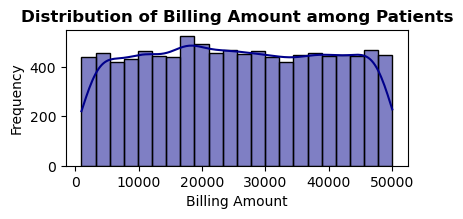

____________________________________________________________________________________________________


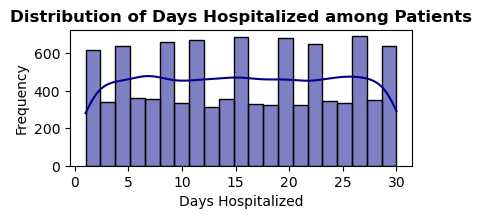

In [13]:
#plotting histograms to find the frequency of numeric columns (age, billing amount and days hospitalized)
for col in healthcare.columns:
    if healthcare[col].dtype == 'int' or healthcare[col].dtype == 'float':
        plt.figure(figsize = (15,6))
        plt.style.use('seaborn-v0_8-dark-palette')
        plt.subplot(3,3,3)
        sns.histplot(healthcare[col],kde = True,color = 'darkblue')
        plt.ylabel('Frequency',fontsize = 10)
        plt.xlabel(col,fontsize = 10)
        plt.title(f'Distribution of {col} among Patients',fontsize = 12,weight = 'bold')
        print("_"*100)
        plt.show()

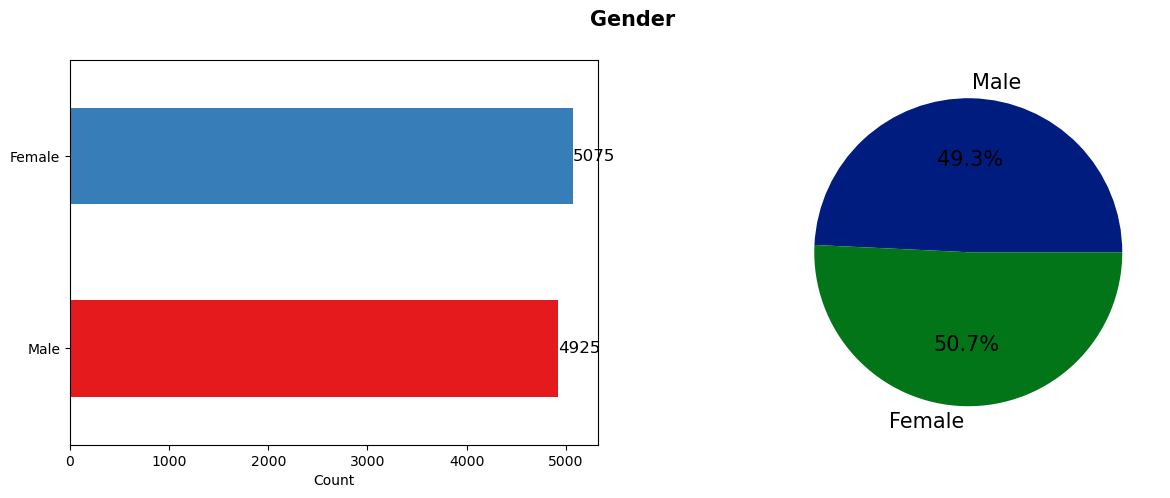

____________________________________________________________________________________________________




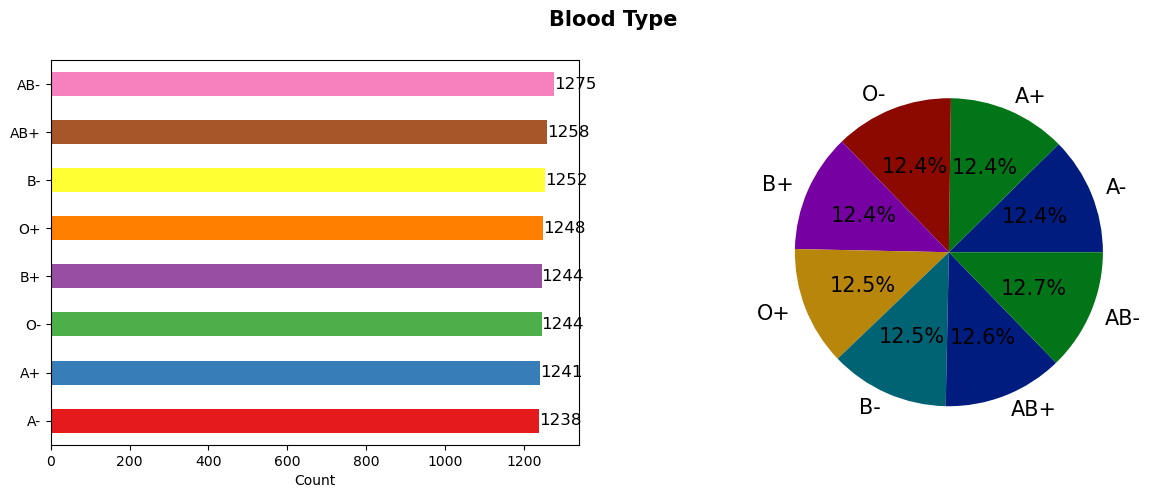

____________________________________________________________________________________________________




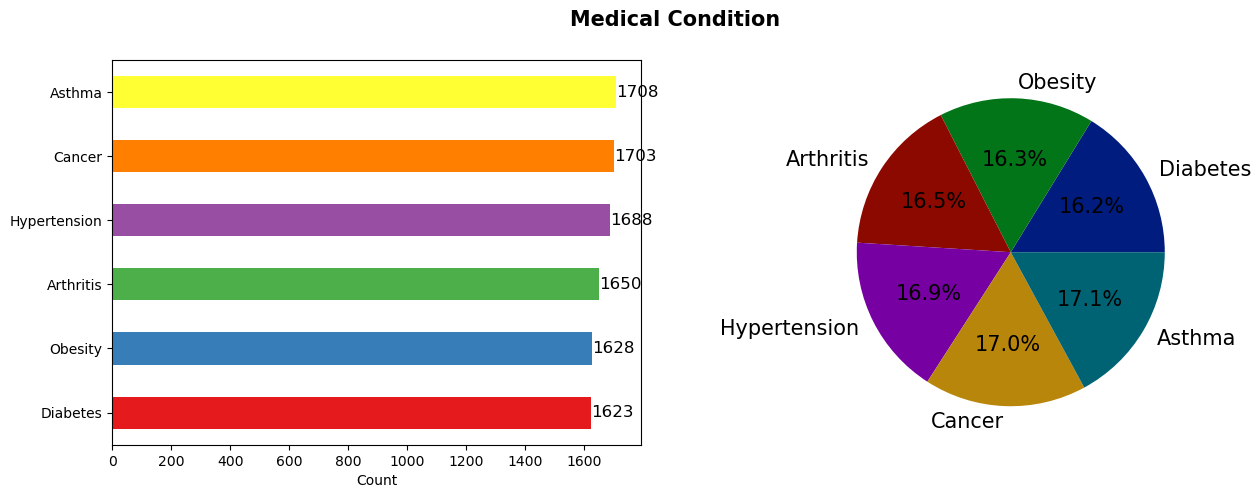

____________________________________________________________________________________________________




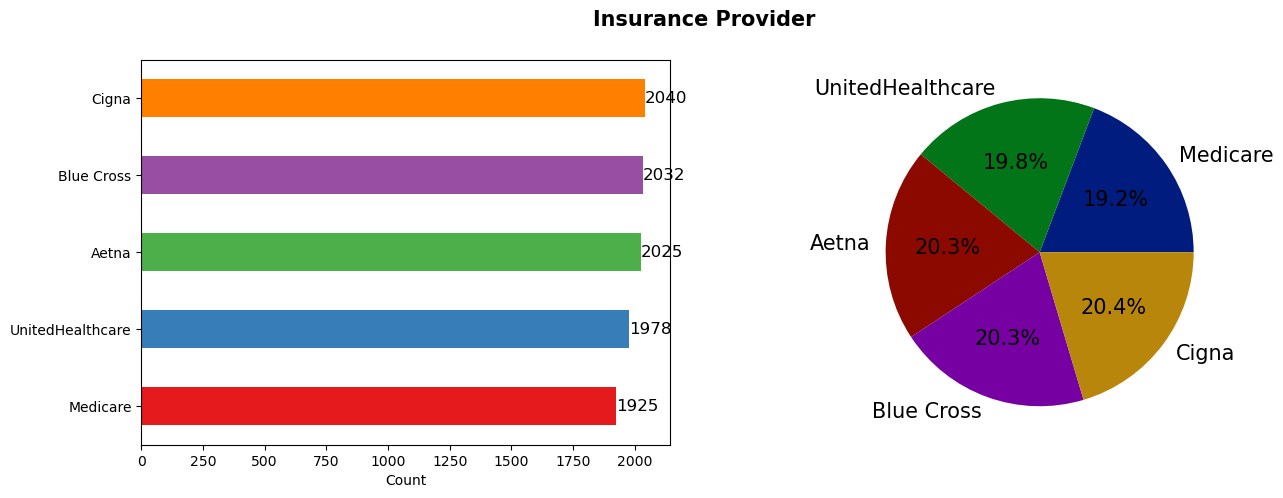

____________________________________________________________________________________________________




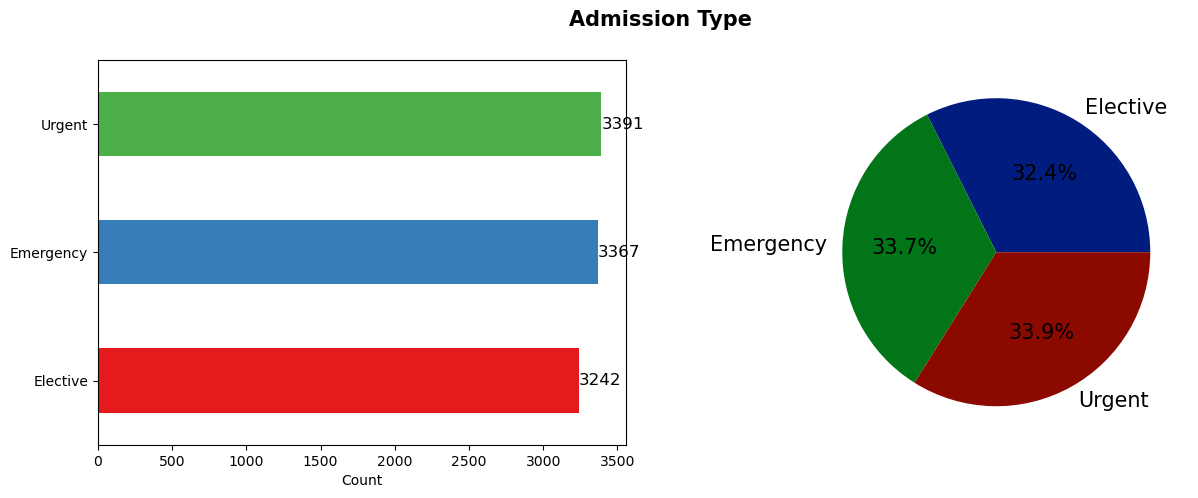

____________________________________________________________________________________________________




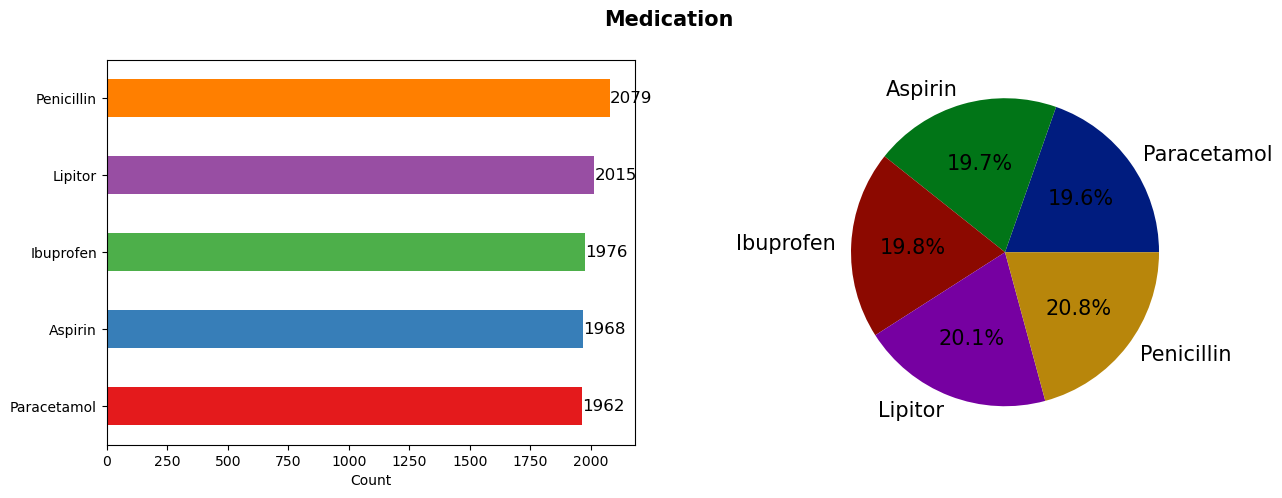

____________________________________________________________________________________________________




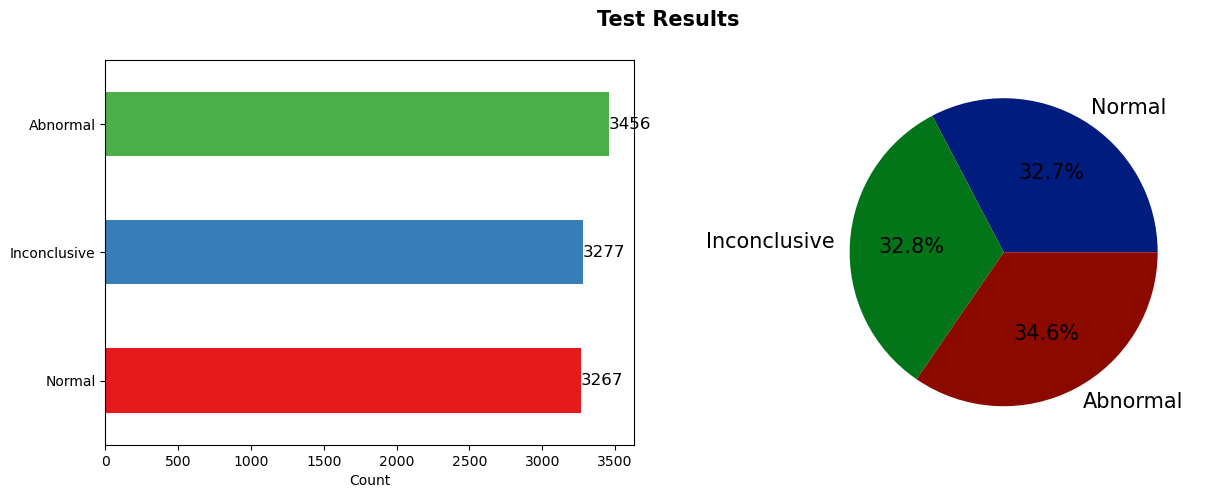

____________________________________________________________________________________________________


In [14]:
#plotting pie chart and bar chart to find the data distribution for categorical columns
#using for loop for visualization of data in categorical columns
for col in healthcare.columns:
    if healthcare[col].dtype == 'O' and col != 'Doctor' and col!= 'Hospital':
        print('\n')
        fig,ax = plt.subplots(1,2,figsize = (15,5))
        fig.suptitle(col,fontsize = 15,weight = 'bold')
        plt.subplot(1,2,1)
        category_count = healthcare[col].value_counts().sort_values()
        category_count.plot(kind = 'barh',color= plt.cm.Set1.colors)
        for index,value in enumerate(category_count):
            plt.text(value,index,str(value),fontsize = 12,va = 'center')
        plt.xlabel('Count')
        plt.subplot(1,2,2)
        category_count.plot(kind = 'pie',
               labels = category_count.index,
               autopct = '%1.1f%%',
               textprops = {'fontsize':15})
        plt.ylabel('')
        plt.show()
        print("_"*100)

**What is the distribution of medical condtions between genders?**

In [15]:
#unstack function converts the data into 2 dimensional
gender_medical = healthcare.groupby(['Medical Condition','Gender']).size().sort_values().unstack()
gender_medical

Gender,Female,Male
Medical Condition,,
Arthritis,815,835
Asthma,874,834
Cancer,887,816
Diabetes,825,798
Hypertension,836,852
Obesity,838,790


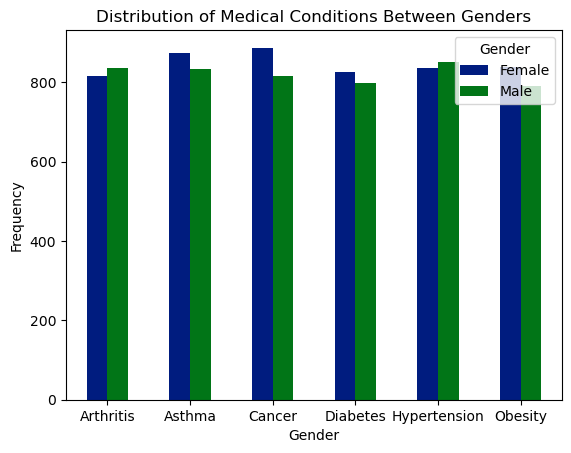

In [16]:
gender_medical.plot(kind = 'bar')
plt.title('Distribution of Medical Conditions Between Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.show()

***Interpretation***

Female have higher share in majority of the medical conditions. Cancer is leading medical condition among female whereas Hypertension is leading cause among male.

**What is the correlation between age,billing amount and days hospitalized**

In [17]:
# selecting the columns to correlate
correlation_columns = ['Age','Billing Amount','Days Hospitalized']
# creating a df using the above columns
correlate_df = healthcare[correlation_columns]
#encoding categorical columns for correlation
correlate_df['Gender'] = healthcare['Gender'].astype('category').cat.codes
correlate_df['Admission Type'] = healthcare['Admission Type'].astype('category').cat.codes
correlate_df['Test Results'] = healthcare['Test Results'].astype('category').cat.codes
# creating correlation matrix
correlation_matrix = correlate_df.corr()
correlation_matrix

,Age,Billing Amount,Days Hospitalized,Gender,Admission Type,Test Results
Age,1.000000,-0.009483,0.009111,-0.008099,0.003233,0.008747
Billing Amount,-0.009483,1.000000,-0.013507,0.002340,0.002531,-0.005844
Days Hospitalized,0.009111,-0.013507,1.000000,-0.006361,-0.005942,-0.008228
Gender,-0.008099,0.002340,-0.006361,1.000000,-0.004515,-0.010472
Admission Type,0.003233,0.002531,-0.005942,-0.004515,1.000000,-0.010964
Test Results,0.008747,-0.005844,-0.008228,-0.010472,-0.010964,1.000000


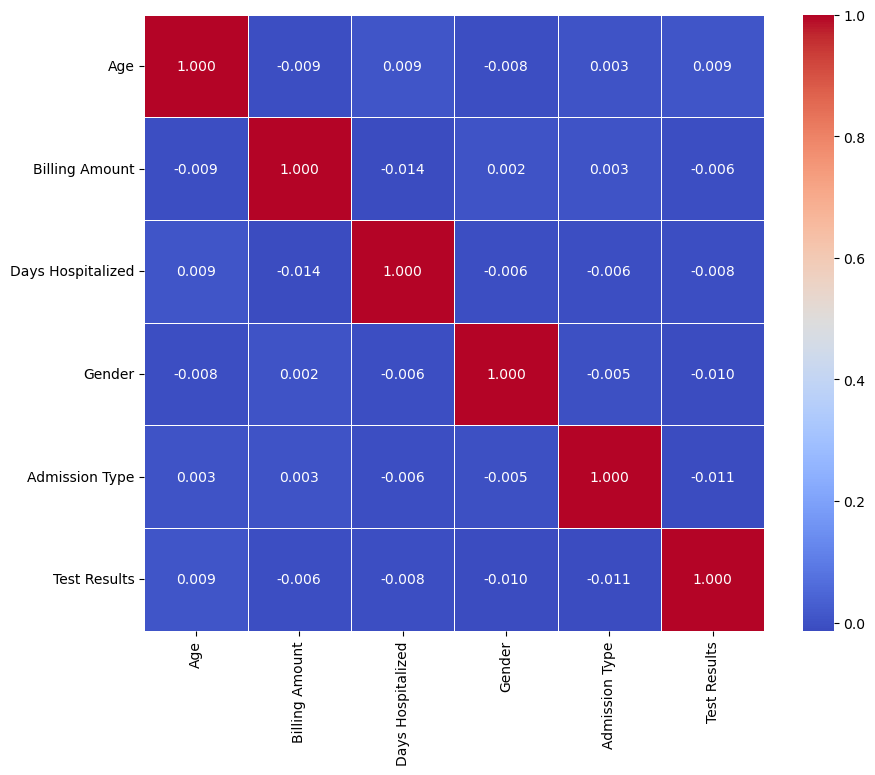

In [18]:
#plotting correlation matrix using heatmap
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm',fmt = '.3f',linewidths = 0.5)
plt.show()

***Interpretation***

* There is a slight correlation between age and test results. Even there is a positive correlation between age and days hospitalized. There is a negative correlation between age and billing amount.
* Biling amount has negative correlation with test results and days hospitalized. Billing amount has a positive correlation with admission type and gender.
* Days hospitalized has negative correlation with every attribute except age.
* Except for billing amount attribute, gender has a negative correlation with all other attributes.
* Admission type and test results have a negative correlation.

**What is the total billing amount for top 10 hospitals?**

In [19]:
# Grouping data by hospital and calculating the average billing amount
top10_hospital_billing = healthcare.groupby(['Hospital'])['Billing Amount'].sum().sort_values(ascending = False)[:10].reset_index()
top10_hospital_billing

,Hospital,Billing Amount
0,Smith and Sons,477638.881124
1,Smith PLC,432283.548554
2,Smith Ltd,428163.073062
3,Smith Inc,351463.888372
4,Williams LLC,327522.472644
5,Thomas Group,327045.374505
6,Johnson Ltd,305971.192470
7,Davis and Sons,293452.520353
8,Jones Inc,290351.193848
9,Brown LLC,284695.674489


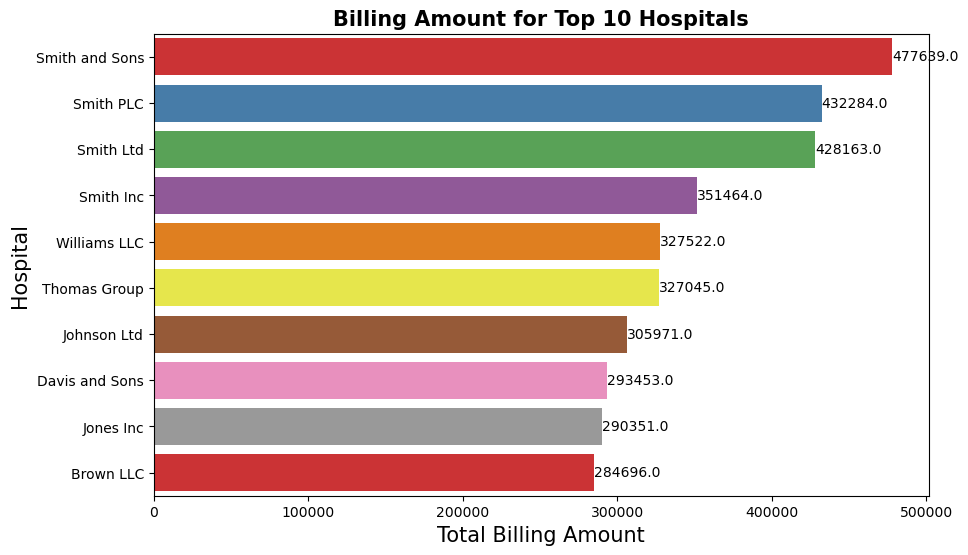

In [20]:
# plot bar graph to find the top 10 hospitals by billing
plt.figure(figsize=(10,6))
sns.barplot(x= top10_hospital_billing['Billing Amount'],
            y= top10_hospital_billing['Hospital'],
            palette="Set1")
for index,value in enumerate(top10_hospital_billing['Billing Amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 10,va = 'center')
# Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 15)
plt.ylabel('Hospital',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Billing Amount for Top 10 Hospitals',fontsize = 15, weight = 'bold')
plt.show()

***INTERPRETATION***

Smith and Sons has the highest average billing amount of 477639.

**Who are the top 20 doctors by billing amount?**

In [21]:
# Grouping data by doctors and calculating the sum of billing amount
top20_doctors_billing = healthcare.groupby(['Doctor'])['Billing Amount'].sum().sort_values(ascending = False)[:20].reset_index()
top20_doctors_billing

,Doctor,Billing Amount
0,Michael Johnson,181576.474893
1,Christopher Davis,159763.924755
2,Jennifer Smith,149972.685230
3,Robert Brown,147747.938399
4,Angela Jones,141867.200639
5,Robert Miller,129493.950567
6,John Jones,127864.878980
7,Leslie Jones,123228.453342
8,Jessica Johnson,122383.408771
9,Daniel Smith,121830.506139


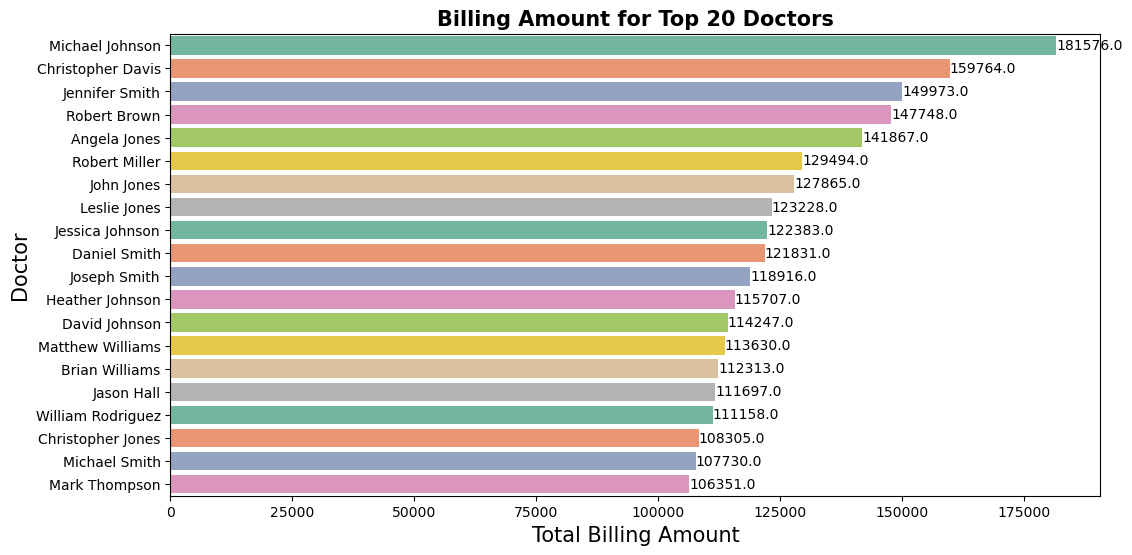

In [22]:
# plot bar graph to find the top 20 doctors by billing
plt.figure(figsize=(12,6))
sns.barplot(x= top20_doctors_billing['Billing Amount'],
            y= top20_doctors_billing['Doctor'],
            palette="Set2")
for index,value in enumerate(top20_doctors_billing['Billing Amount']):
            plt.text(value,index,str(round(value,0)),fontsize = 10,va = 'center')
# Adding labels and title
plt.xlabel('Total Billing Amount',fontsize = 15)
plt.ylabel('Doctor',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Billing Amount for Top 20 Doctors',fontsize = 15, weight = 'bold')
plt.show()

***Interpretation***


Doctor Michael Johnson is the top doctor with a total billing amount of 181576.

**Which medical condition generated the highest average billing among male and female?**

In [23]:
# Grouping data by medical condition and gender then calculating the mean of billing amount
medical_gender_billing = healthcare.groupby(['Medical Condition','Gender'])[['Billing Amount']].mean().reset_index()
medical_gender_billing

,Medical Condition,Gender,Billing Amount
0,Arthritis,Female,24692.417417
1,Arthritis,Male,25670.983684
2,Asthma,Female,25672.743141
3,Asthma,Male,25148.724551
4,Cancer,Female,25370.465132
5,Cancer,Male,25722.399683
6,Diabetes,Female,26369.383481
7,Diabetes,Male,25740.384845
8,Hypertension,Female,25126.230138
9,Hypertension,Male,25268.489378


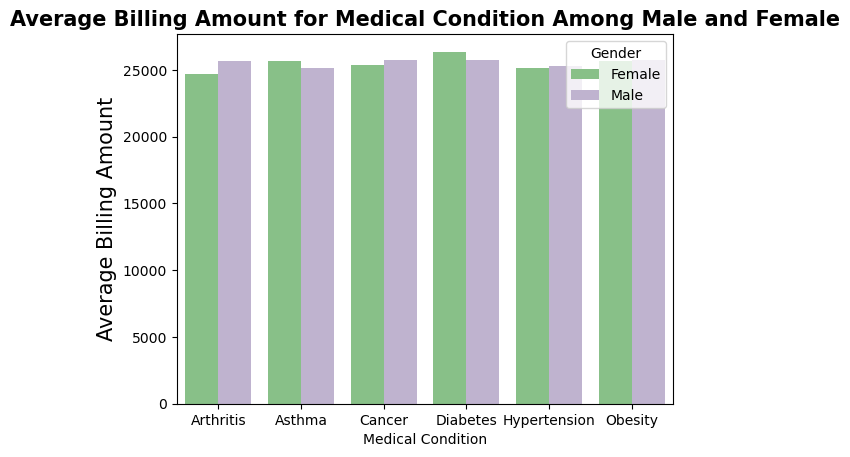

In [24]:
# plot bar graph to find the average billing amount for medical condition among male and female
sns.barplot(x= medical_gender_billing['Medical Condition'],
            y= medical_gender_billing['Billing Amount'],
            hue = medical_gender_billing['Gender'],ci = None,
            palette="Accent")
# Adding labels and title
plt.ylabel('Average Billing Amount',fontsize = 15)
plt.title('Average Billing Amount for Medical Condition Among Male and Female',fontsize = 15, weight = 'bold')
plt.show()

**What is the distribution of different age groups?**

In [25]:
min_age = healthcare['Age'].min()
max_age = healthcare['Age'].max()
print(min_age,",",max_age)

18 , 85


In [26]:
healthcare['Age_Group'] = pd.cut(healthcare['Age'],bins = [18,30,40,50,60,70,80,float('inf')],
                                labels = ['18-30','31-40','41-50','51-60','61-70','71-80','Over 80'],
                                right = False)
Age_group = healthcare['Age_Group'].value_counts().sort_values(ascending = False)
Age_group

18-30      1774
71-80      1523
51-60      1521
31-40      1495
61-70      1467
41-50      1397
Over 80     823
Name: Age_Group, dtype: int64

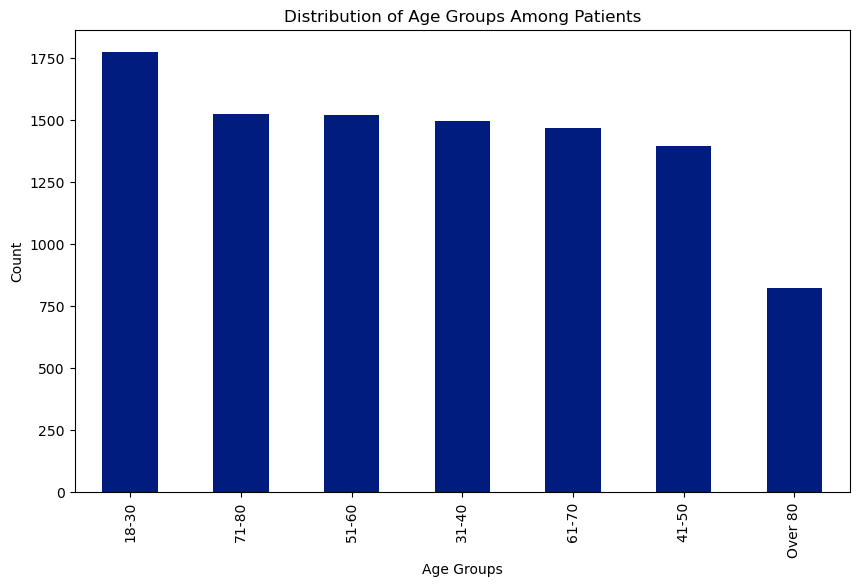

In [27]:
plt.figure(figsize=(10,6))
Age_group.plot(kind = 'bar')
plt.title('Distribution of Age Groups Among Patients')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

***Interpretation***

The maximum number of patients are in the range of 18-30.

**CONCLUSION**

- Compared to male, there are high female patients.
- Most patients have the blood type of **AB-**.
- Asthma is the major medical condition among patients.
- Cigna is the leading insurance provider.
- Pencilin is the most prescribed medication.